# Assignment 7 : Clustering - Airlines data

In [2]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_excel("EastWestAirlines_1.xlsx");

df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [10]:
df.rename(columns = {'ID#':'ID'}, inplace = True)
df.rename(columns = {'Award?':'Award'}, inplace = True)


In [11]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [12]:
df.dtypes

ID                   int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [13]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [15]:
df=df.drop('ID', axis=1)

In [16]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


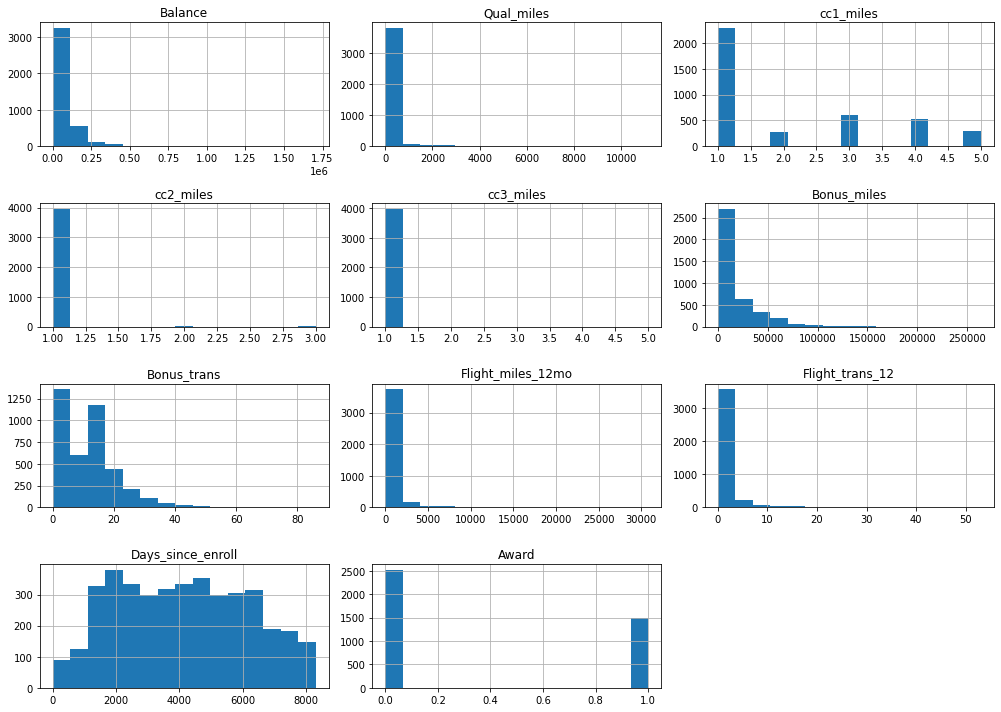

In [17]:
df.hist(figsize=(14,10), bins=15)
plt.tight_layout()
plt.show()

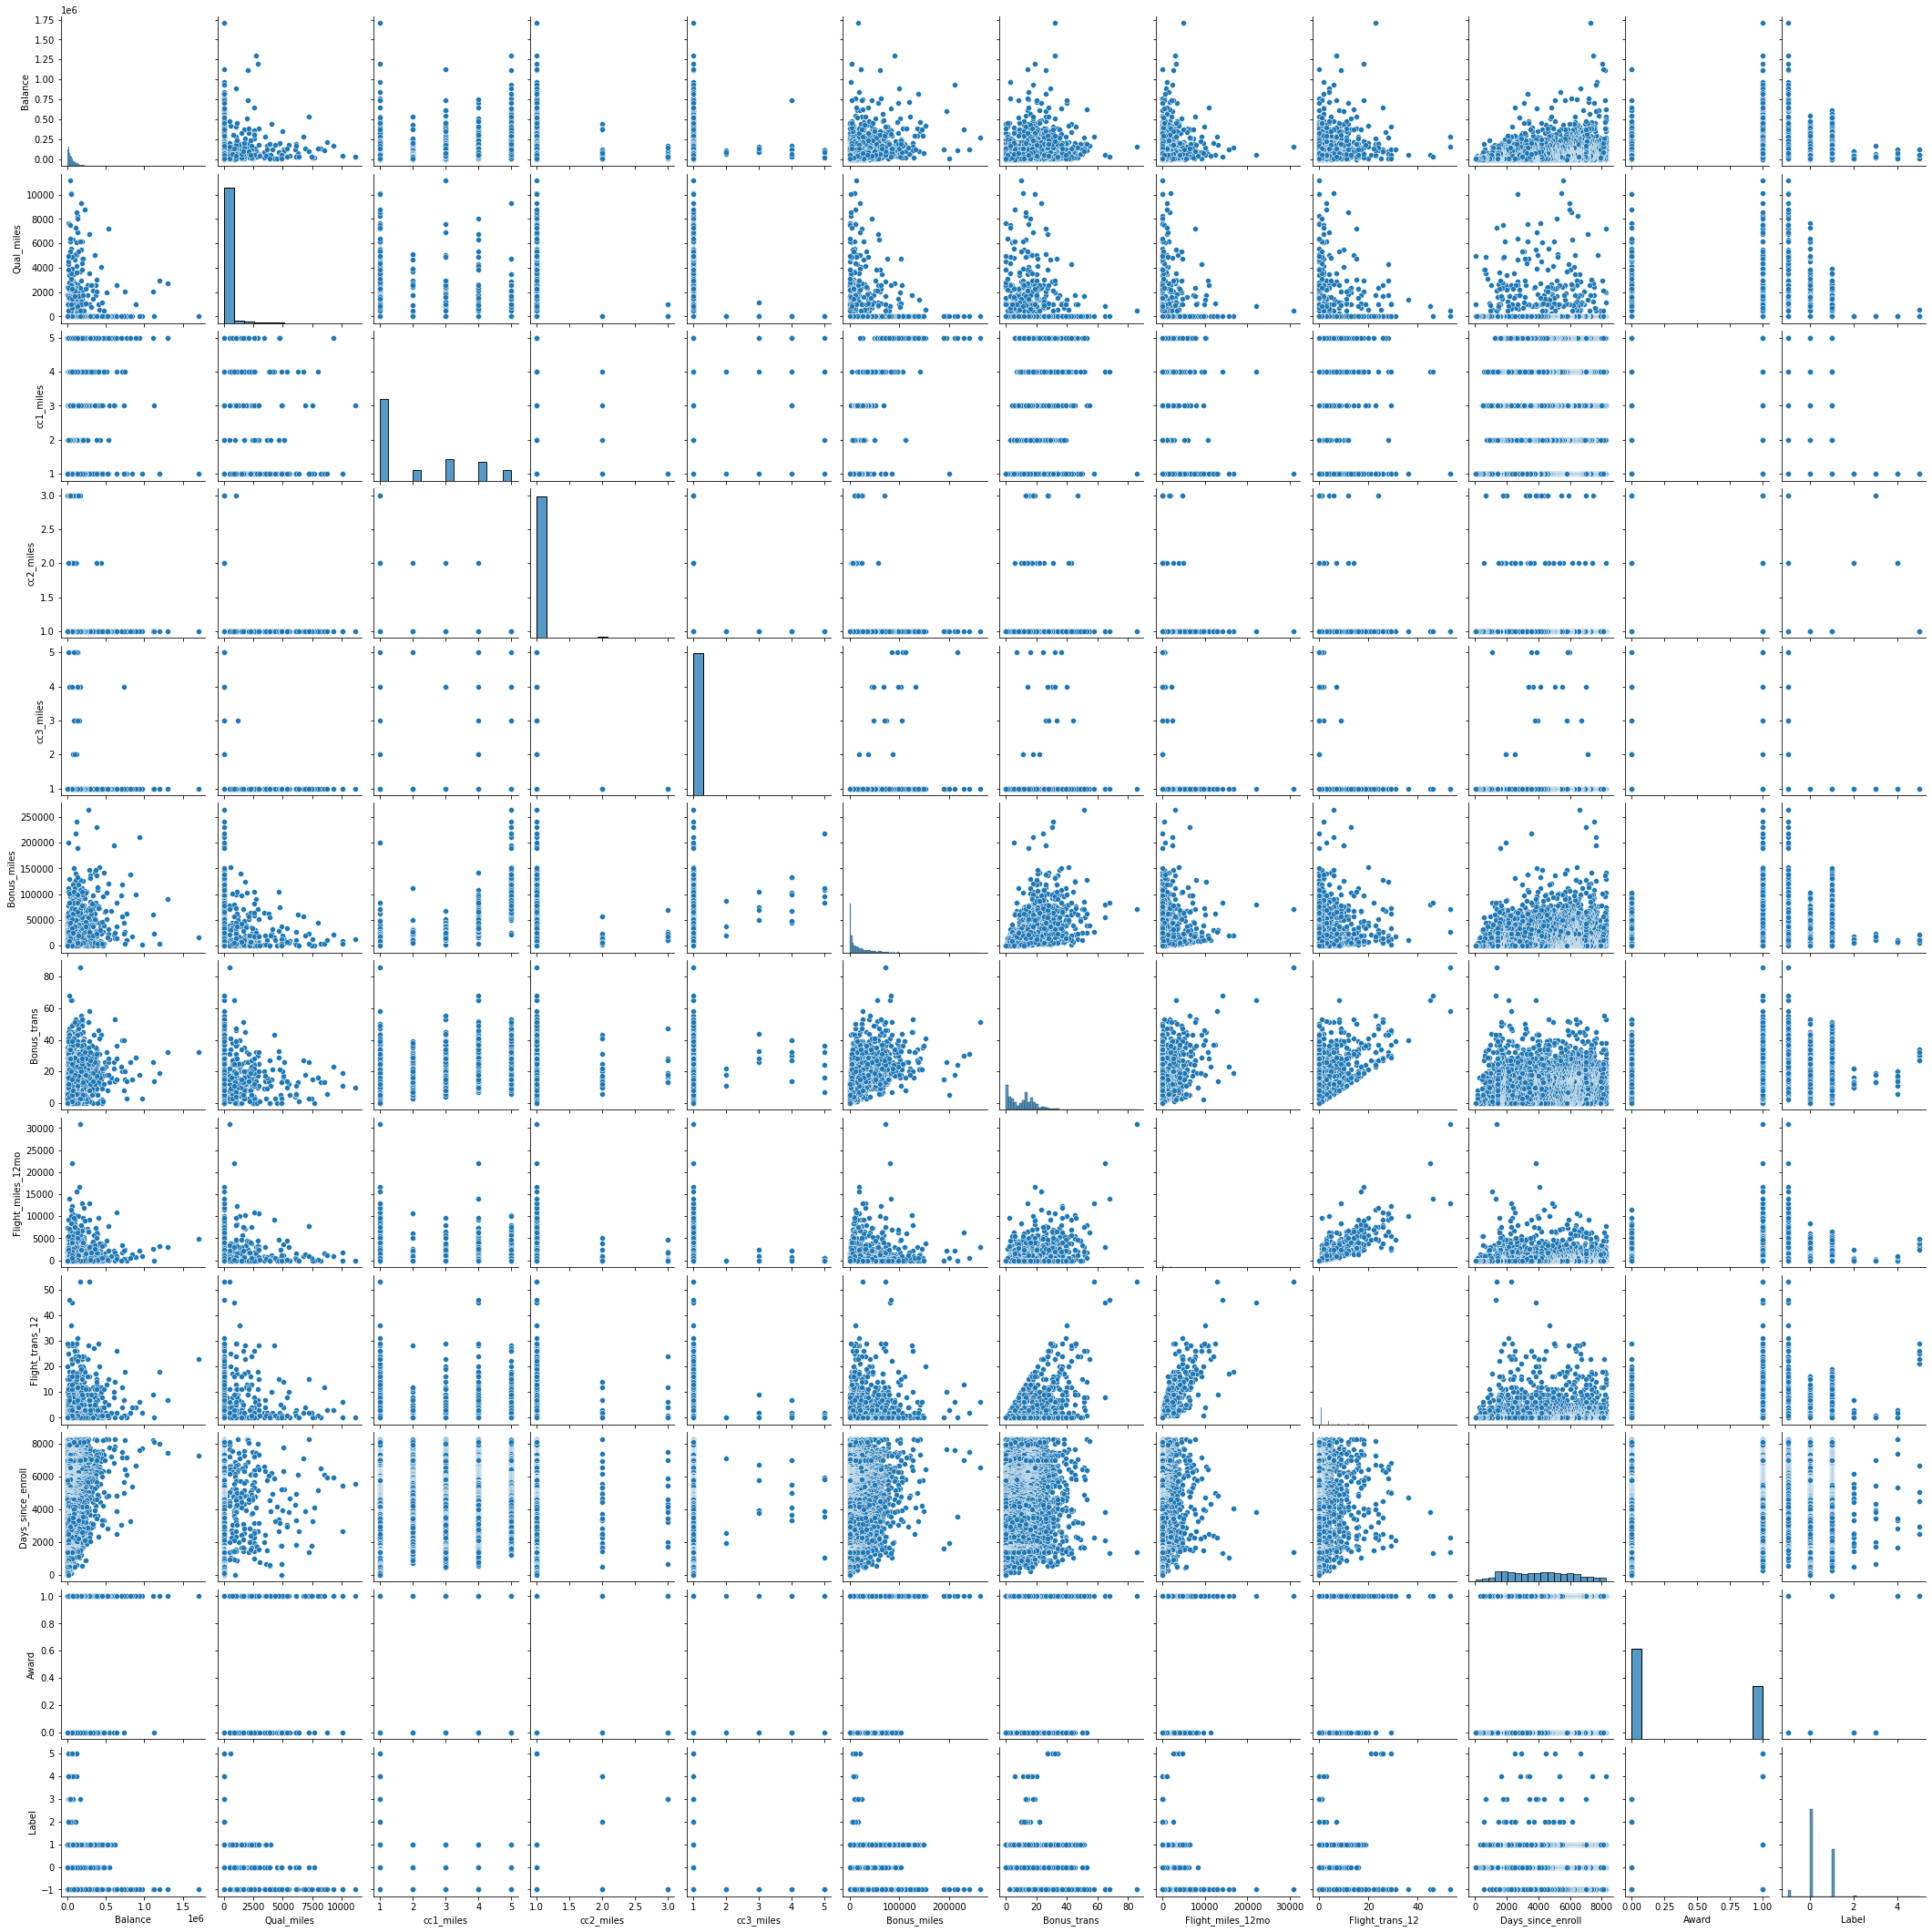

In [31]:
sns.pairplot(df)

<AxesSubplot:>

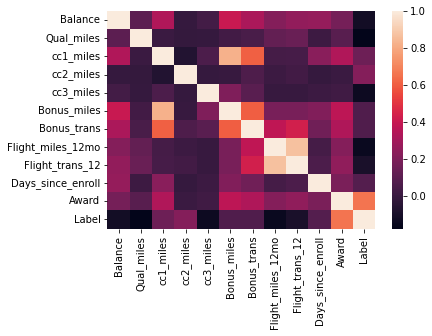

In [32]:
sns.heatmap(df.corr())

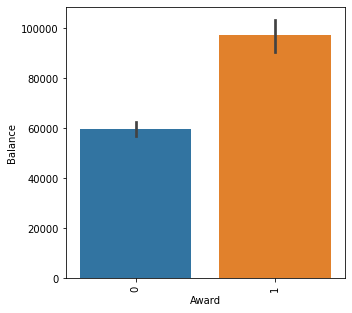

In [33]:
plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

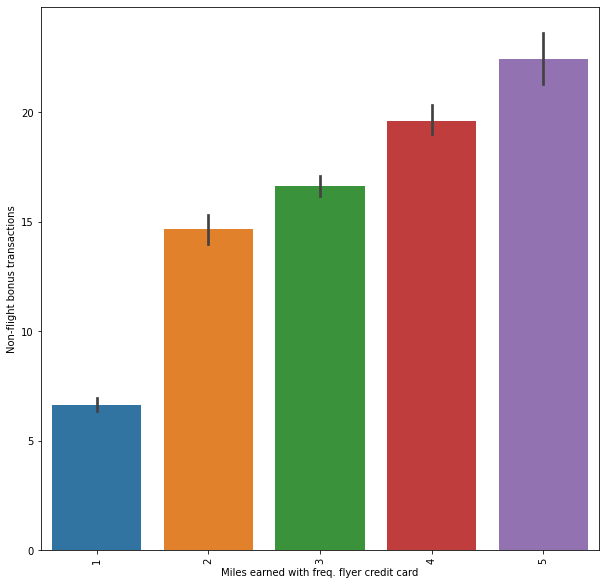

In [34]:
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

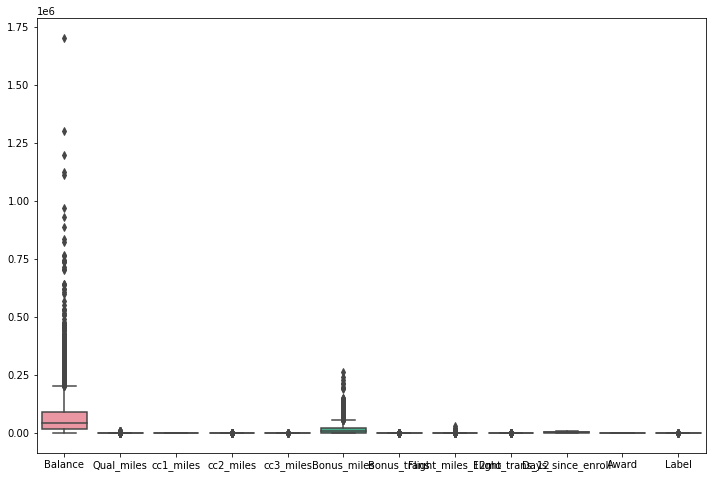

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


<AxesSubplot:>

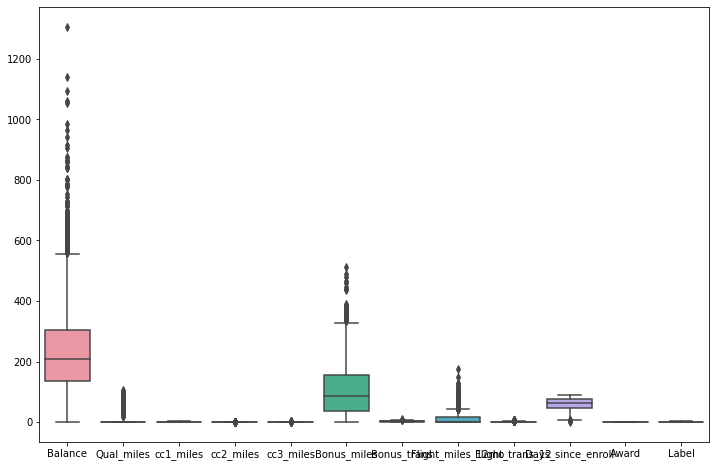

In [36]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [37]:
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1= df[(df['Balance']>ll)&(df['Balance']<ul)]
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [38]:
q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

In [39]:
# Removing outliers from Flight_miles_12mo

q1 = df['Flight_miles_12mo'].quantile(0.25)
q3 = df['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]

<AxesSubplot:>

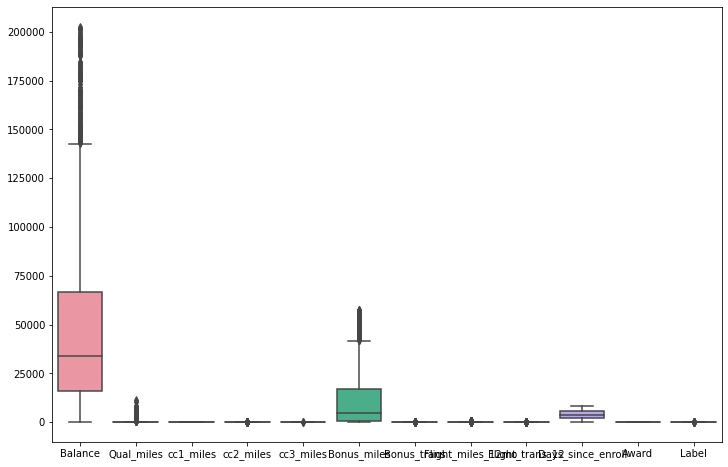

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

In [41]:
array = df3.values
array

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     1],
       [54899,     0,     1, ...,  1401,     0,     0],
       [ 3016,     0,     1, ...,  1398,     0,     0]], dtype=int64)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
stscaler = StandardScaler().fit(df3)
X = stscaler.transform(df3)

In [44]:
X

array([[-0.4537746 , -0.15023499, -0.70923455, ...,  1.50378589,
        -0.64237673, -0.57994442],
       [-0.66052249, -0.15023499, -0.70923455, ...,  1.48814238,
        -0.64237673, -0.57994442],
       [-0.14684725, -0.15023499, -0.70923455, ...,  1.52040713,
        -0.64237673, -0.57994442],
       ...,
       [ 0.60224504, -0.15023499,  1.02135348, ..., -1.23285115,
         1.55671891,  1.31955708],
       [ 0.16783982, -0.15023499, -0.70923455, ..., -1.23334   ,
        -0.64237673, -0.57994442],
       [-1.03754293, -0.15023499, -0.70923455, ..., -1.23480658,
        -0.64237673, -0.57994442]])

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [47]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
df3["Label"] = dbscan.labels_

C:\Users\ankit\AppData\Local\Temp\ipykernel_4180\82889330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Label"] = dbscan.labels_


In [49]:
df3["Label"].value_counts()

 0    2139
 1     845
-1      94
 3      12
 4       8
 2       7
Name: Label, dtype: int64

In [50]:
df3[df3["Label"]==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Label
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
226,117329,0,1,2,1,6448,11,0,0,7416,1,-1
282,190542,1745,1,1,1,8487,9,0,0,7267,0,-1
336,105166,1374,4,1,1,37663,22,0,0,7120,0,-1
343,112501,0,1,1,2,19140,11,0,0,7101,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3811,15832,2376,1,1,1,8130,20,500,1,1698,1,-1
3819,20971,1490,4,1,1,43527,34,0,0,1695,1,-1
3837,8150,0,1,2,1,14135,41,500,2,1676,1,-1
3863,16152,0,1,1,1,6129,19,500,5,1635,1,-1


In [51]:
df3[df3["Label"]==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Label
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
226,117329,0,1,2,1,6448,11,0,0,7416,1,-1
282,190542,1745,1,1,1,8487,9,0,0,7267,0,-1
336,105166,1374,4,1,1,37663,22,0,0,7120,0,-1
343,112501,0,1,1,2,19140,11,0,0,7101,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3811,15832,2376,1,1,1,8130,20,500,1,1698,1,-1
3819,20971,1490,4,1,1,43527,34,0,0,1695,1,-1
3837,8150,0,1,2,1,14135,41,500,2,1676,1,-1
3863,16152,0,1,1,1,6129,19,500,5,1635,1,-1


In [52]:
df3[df3["Label"]==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [53]:
df3.groupby("Label").agg(['mean']).reset_index()

,Label,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,79336.265957,2185.276596,1.893617,1.180851,1.053191,17589.840426,14.670213,268.414894,1.521277,3978.702128,0.585106
1,0,45550.504909,27.527349,1.582048,1.000000,1.000000,7745.670407,8.150538,52.002805,0.209911,3735.810659,0.000000
2,1,49886.246154,21.403550,2.434320,1.000000,1.000000,18735.751479,12.538462,97.236686,0.378698,4397.480473,1.000000
3,2,39939.142857,2269.428571,1.571429,1.000000,1.000000,6343.000000,7.571429,0.000000,0.000000,5226.857143,1.000000
4,3,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000
5,4,36524.250000,0.000000,1.000000,3.000000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.000000
